In [2]:
import os
from glob import glob
import pyfits

In [3]:
os.chdir("/home/data/sandbox/3C273_all/")
ilist=glob("0*")
len(ilist)

38

In [8]:
ilist.sort()

In [10]:
pnlist=[d for d in ilist if os.path.exists(d+'/odf/pn')]
moslist=[d for d in ilist if os.path.exists(d+'/odf/mos')]
len(pnlist),len(moslist)

(25, 33)

In [13]:
os.listdir("0112770101/odf/pn")

['0370_0112770101_EPN_S001_ImagingEvts.ds',
 '0370_0112770101_EPN_S001_04_Badpixels.ds',
 '0370_0112770101_AttHk.ds']

In [14]:
pnevts=[glob(d+'/odf/pn/*ingEvts.ds') for d in pnlist]
mosevts=[glob(d+'/odf/mos/*ingEvts.ds') for d in moslist]
nmax=max([len(a) for a in mosevts])
from numpy import histogram,r_
histogram([len(a) for a in mosevts],r_[:nmax+1])

(array([ 2,  0, 18,  7,  4,  0,  1,  0,  1]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

array([  3.        ,   4.16666667,   5.33333333,   6.5       ,
         7.66666667,   8.83333333,  10.        ])

In [27]:
acnt=r_[[len(a) for a in mosevts]]
from numpy import where
where(acnt==9)

(array([22]),)

In [33]:
from numpy import array
acnt=array([len(a) for a in mosevts])
alist=array(moslist)
alist[acnt==4]

array(['0126700101', '0126700401', '0136550101', '0136550801'], 
      dtype='<U10')

In [32]:
[moslist[i] for i in where(acnt==4)[0]]

['0126700101', '0126700401', '0136550101', '0136550801']

In [35]:
r_[:len(moslist)][acnt==4]

array([ 9, 12, 17, 20])

In [38]:
mosevts[r_[:len(acnt)][acnt==3][0]]

['0112770101/odf/mos/0370_0112770101_EMOS2_S003_ImagingEvts.ds',
 '0112770101/odf/mos/0370_0112770101_EMOS1_S002_TimingEvts.ds',
 '0112770101/odf/mos/0370_0112770101_EMOS1_S002_ImagingEvts.ds']

In [39]:
selevts=mosevts[r_[:len(acnt)][acnt==9][0]]
[os.path.getsize(m)//2**10 for m in selevts]

[1549, 3403, 1605, 3912, 5318, 1546, 3735, 1215, 1642]

In [41]:
[s for s in selevts if s.find("Imaging")>=0]

['0137551001/odf/mos/0382_0137551001_EMOS2_U008_ImagingEvts.ds',
 '0137551001/odf/mos/0382_0137551001_EMOS2_U005_ImagingEvts.ds',
 '0137551001/odf/mos/0382_0137551001_EMOS1_U004_ImagingEvts.ds',
 '0137551001/odf/mos/0382_0137551001_EMOS1_U007_ImagingEvts.ds',
 '0137551001/odf/mos/0382_0137551001_EMOS1_U008_ImagingEvts.ds',
 '0137551001/odf/mos/0382_0137551001_EMOS2_U007_ImagingEvts.ds',
 '0137551001/odf/mos/0382_0137551001_EMOS2_U004_ImagingEvts.ds']

In [43]:
selevts=[s for s in selevts if s.find('Imaging')>0]
ifi=pyfits.open(selevts[3])
ifi

In [45]:
ifi[1].columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RAWX'; format = 'I'; unit = 'PIXELS'
    name = 'RAWY'; format = 'I'; unit = 'PIXELS'
    name = 'DETX'; format = 'I'; unit = 'pixel'
    name = 'DETY'; format = 'I'; unit = 'pixel'
    name = 'X'; format = 'J'; unit = 'pixel'; null = -99999999
    name = 'Y'; format = 'J'; unit = 'pixel'; null = -99999999
    name = 'PHA'; format = 'I'; unit = 'CHAN'
    name = 'PI'; format = 'I'; unit = 'CHAN'
    name = 'FLAG'; format = 'J'
    name = 'PATTERN'; format = 'B'
    name = 'CCDNR'; format = 'B'
)

In [48]:
histogram(ifi[1].data['PATTERN'],r_[:27])

(array([104783,   8834,   2523,   7185,   2559,    264,    281,    270,
           289,    354,    226,    280,    339,     41,     16,     31,
            27,     35,     28,     24,     18,     29,     23,     30,
            19,     31]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]))

In [52]:
sum(ifi[1].data['PATTERN']<=12)/float(len(ifi[1].data))

0.99726153151961661

In [55]:
print(ifi[1].header['NAXIS2'])

128539


In [60]:
[ff.header['NAXIS2'] for ff in ifi[1:]]

[128539,
 56,
 23625,
 0,
 2625,
 1045,
 2616,
 618,
 2618,
 1620,
 2619,
 1202,
 2618,
 427,
 2625,
 658,
 118,
 2,
 1,
 2,
 2,
 2,
 2,
 1]

In [11]:
print(str(ifi[1].header)[:1000])

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                   34 / width of table in bytes                        NAXIS2  =               128539 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                   12 / number of fields in each row                   TTYPE1  = 'TIME    '           / time of the center of the frame                TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            TUNIT1  = 's       '           / physical unit of field                         TTYPE2  = 'RAWX    '           / X in node coordinates                          TFORM2  = 'I       '           / data fo

In [61]:
[ff.header['NAXIS2'] for ff in ifi[1:]]

[128539,
 56,
 23625,
 0,
 2625,
 1045,
 2616,
 618,
 2618,
 1620,
 2619,
 1202,
 2618,
 427,
 2625,
 658,
 118,
 2,
 1,
 2,
 2,
 2,
 2,
 1]

In [65]:
[a for a in ifi[1].header.keys()]

['XTENSION',
 'BITPIX',
 'NAXIS',
 'NAXIS1',
 'NAXIS2',
 'PCOUNT',
 'GCOUNT',
 'TFIELDS',
 'TTYPE1',
 'TFORM1',
 'TUNIT1',
 'TTYPE2',
 'TFORM2',
 'TUNIT2',
 'TTYPE3',
 'TFORM3',
 'TUNIT3',
 'TTYPE4',
 'TFORM4',
 'TUNIT4',
 'TTYPE5',
 'TFORM5',
 'TUNIT5',
 'TTYPE6',
 'TFORM6',
 'TUNIT6',
 'TTYPE7',
 'TFORM7',
 'TUNIT7',
 'TTYPE8',
 'TFORM8',
 'TUNIT8',
 'TTYPE9',
 'TFORM9',
 'TUNIT9',
 'TTYPE10',
 'TFORM10',
 'TTYPE11',
 'TFORM11',
 'TTYPE12',
 'TFORM12',
 'EXTNAME',
 'TSTART',
 'TSTOP',
 'DET_SYST',
 'TIMEUNIT',
 'TIMESYS',
 'MJDREF',
 'TIMEREF',
 'TASSIGN',
 'TIMEZERO',
 'CLOCKAPP',
 'XMMEA_0',
 'XMMEA_1',
 'XMMEA_2',
 'XMMEA_5',
 'XMMEA_6',
 'XMMEA_8',
 'XMMEA_9',
 'XMMEA_10',
 'XMMEA_11',
 'XMMEA_15',
 'XMMEA_16',
 'XMMEA_17',
 'XMMEA_19',
 'XMMEA_21',
 'XMMEA_22',
 'XMMEA_25',
 'XMMEA_26',
 'XMMEA_28',
 'XMMEA_29',
 'XMMEA_30',
 'XMMEA_EM',
 'XMMEA_SM',
 'XMMEA_13',
 'TELAPSE',
 'LONGSTRN',
 'DATAMODE',
 'TELESCOP',
 'INSTRUME',
 'OBS_ID',
 'EXP_ID',
 'DATE-OBS',
 'DATE-END',
 'OBS

hledani klicu v headeru 
`(ftlist xx.fits K include="*START")`

In [36]:
ifi[-1].data

FITS_rec([(126963387.12580328, 126970474.74036428)], 
      dtype=[('START', '>f8'), ('STOP', '>f8')])

In [66]:
[pyfits.open(s)[1].header['NAXIS2'] for s in selevts]

[24949, 78540, 33519, 128539, 24807, 21731, 34212]

In [67]:
hdrs=[pyfits.open(s)[1].header for s in selevts]
t0=ifi[1].header['TSTART']
[(h['TSTART']-t0,h['TSTOP']-t0) for h in hdrs]

[(8735.288197010756, 17648.218604013324),
 (1.399948999285698, 4317.539826005697),
 (-2816.335063993931, -870.5150090008974),
 (0.0, 7095.984313011169),
 (8481.605840012431, 17646.7603880018),
 (6859.469411000609, 8028.598056003451),
 (-2822.2287329882383, -867.3918569982052)]

nejaka grafika
-------------

generovani histogramu z *evtlistu*

In [15]:
%matplotlib inline
from matplotlib import pyplot as pl
times=ifi[1].data['TIME']
t0=times.min()

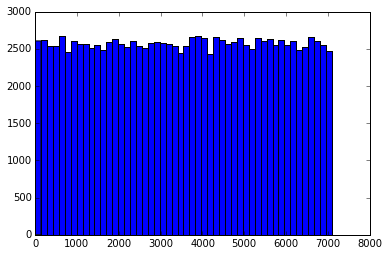

In [17]:
rep=pl.hist(times-t0,50)

In [18]:
plot(rep[1],rep[0])

NameError: name 'plot' is not defined

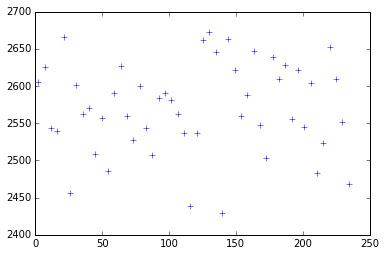

In [19]:
#stredy binu v minutach
x=(rep[1][:-1]+rep[1][1:])/60.
pl.plot(x,rep[0],'+')

In [23]:
# zpet k PN datum
[len(p) for p in pnevts]

[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1]

In [40]:
hdrs2=[pyfits.open(p[0])[1].header for p in pnevts if len(p)>0 and p[0].find("Imaging")>0]


In [41]:
[((h['TSTART']-t0)/(24*3600),h['TELAPSE']/(24*3600)) for h in hdrs2]

[(-23.817905820509143, 0.057877283831023495),
 (-18.453615951585515, 0.057883060208211344),
 (544.9610400913313, 0.0938931048723559),
 (179.12187233120392, 0.057874701238340855),
 (361.2459105708914, 0.057874593229067586),
 (342.45481065559045, 0.057877259641126846),
 (524.5675215297802, 0.06380030116894178),
 (704.3291437098613, 0.09805628813630729),
 (-575.1518413528495, 0.03926558542599965),
 (-574.9016950177939, 0.2615795013693125),
 (-574.4814763881919, 0.7618093558425011),
 (-573.0809252343796, 0.054401620503480554),
 (-571.9914138502903, 0.08535913125335891),
 (-572.9270320209109, 0.3437570096216065),
 (-572.4869140223947, 0.34722166933567705),
 (-570.4923279573101, 0.7017596333958553),
 (-210.16871155023145, 1.0256993237731076),
 (361.11628433724536, 0.09851684635436087),
 (903.3320270485995, 0.20903136476874304),
 (1278.0985631245949, 0.32027120765057177),
 (544.257337101933, 0.6725909406019167),
 (1992.7353301383216, 0.37119875209475)]

In [43]:
[h['NAXIS2'] for h in hdrs2]

[332600,
 311357,
 507579,
 246778,
 303082,
 360172,
 399090,
 415399,
 360421,
 3045884,
 2827192,
 309879,
 1619592,
 1174279,
 1165075,
 2468434,
 4744569,
 482777,
 697232,
 1215307,
 3720726,
 1291866]

In [47]:
data=ifi[1].data
sel1=(data['PATTERN']<12)
sel2=(data['PI']>1000)*(data['PI']<12000)
sum(sel1),sum(sel2),sum(sel1*sel2)

(127848, 66044, 65389)